## installing Jupyter Notebook

* Install [python 3.6.5](https://www.python.org/ftp/python/3.6.5/python-3.6.5-amd64.exe)
* While installing do not forgot to check **Add To Path**
![](https://datatofish.com/wp-content/uploads/2018/10/0001_add_Python_to_Path.png)
* Clone or download this repository
* Navigate to this folder using cmd
* Enter following commands:
    1. python -m pip install --upgrade pip
    2. python -m venv venv
    3. .\venv\Scripts\activate
    4. pip install -r requirements.txt
    5. jupyter notebook
* 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

## Reading CSV

In [2]:
df = pd.read_csv('dataset/dataset2.csv')
df.head(4)

,ROLLNO,STUDENT_NAME,BE103_First,BE110_First,BE101-05_First,CS110_First,EE100_First,EE110_First,MA101_First,PH100_First,...,CS409_Second,ELECTIVE3_Second,SGPA_S1,SGPA_S2,SGPA_S3,SGPA_S4,SGPA_S5,SGPA_S6,Unnamed: 107,Unnamed: 108
0,1.0,ABHIN JOY J A,55.0,45.0,80.0,47.0,70.0,57.0,65.0,45.0,...,25.0,45.0,7.00,0.00,0.00,0.00,0.00,6.22,NaN,NaN
1,2.0,AHKIN JACOB,60.0,93.0,60.0,57.0,70.0,60.0,60.0,55.0,...,75.0,25.0,6.80,6.21,0.00,0.00,0.00,0.00,NaN,NaN
2,3.0,AIRIN REGI,70.0,68.0,70.0,47.0,85.0,53.0,85.0,95.0,...,35.0,100.0,7.89,7.08,7.35,6.87,7.67,7.11,NaN,NaN
3,4.0,AJO ANTONY,55.0,73.0,75.0,50.0,70.0,57.0,30.0,65.0,...,20.0,45.0,6.67,0.00,0.00,0.00,0.00,0.00,NaN,NaN


## Datset Preprocessing

In [3]:
df.shape

(112, 109)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Columns: 109 entries, ROLLNO to Unnamed: 108
dtypes: float64(107), object(2)
memory usage: 95.5+ KB


### Known things about Dataset
* From the above dataset we can conclude that dataset contains some NaN values, So that dataset cleaning is required


In [5]:
df.isnull().sum()

ROLLNO              2
STUDENT_NAME        2
BE103_First         5
BE110_First         5
BE101-05_First      5
                 ... 
SGPA_S4             4
SGPA_S5             4
SGPA_S6             4
Unnamed: 107      112
Unnamed: 108      111
Length: 109, dtype: int64

* Last two columns are unnamed and contains NaN values. We can't do any statistical operations on those data. So just drop those columns.

In [6]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(4)

,ROLLNO,STUDENT_NAME,BE103_First,BE110_First,BE101-05_First,CS110_First,EE100_First,EE110_First,MA101_First,PH100_First,...,CS405_Second,CS407_Second,CS409_Second,ELECTIVE3_Second,SGPA_S1,SGPA_S2,SGPA_S3,SGPA_S4,SGPA_S5,SGPA_S6
0,1.0,ABHIN JOY J A,55.0,45.0,80.0,47.0,70.0,57.0,65.0,45.0,...,45.0,65.0,25.0,45.0,7.00,0.00,0.00,0.00,0.00,6.22
1,2.0,AHKIN JACOB,60.0,93.0,60.0,57.0,70.0,60.0,60.0,55.0,...,60.0,20.0,75.0,25.0,6.80,6.21,0.00,0.00,0.00,0.00
2,3.0,AIRIN REGI,70.0,68.0,70.0,47.0,85.0,53.0,85.0,95.0,...,75.0,70.0,35.0,100.0,7.89,7.08,7.35,6.87,7.67,7.11
3,4.0,AJO ANTONY,55.0,73.0,75.0,50.0,70.0,57.0,30.0,65.0,...,55.0,50.0,20.0,45.0,6.67,0.00,0.00,0.00,0.00,0.00


* We successfully removed Unnamed colums successfully from our dataset which contains NaN values.
* Now take a look a tail end of our dataset. Since some students dropped out the course. There is chance for inadequate data and hence NaN value on the tail end.

In [7]:
df.tail(5)

,ROLLNO,STUDENT_NAME,BE103_First,BE110_First,BE101-05_First,CS110_First,EE100_First,EE110_First,MA101_First,PH100_First,...,CS405_Second,CS407_Second,CS409_Second,ELECTIVE3_Second,SGPA_S1,SGPA_S2,SGPA_S3,SGPA_S4,SGPA_S5,SGPA_S6
107,47.0,STEVE SAJU,50.0,50.0,75.0,63.0,35.0,60.0,60.0,15.0,...,35.0,30.0,50.0,30.0,0.00,6.67,0.00,0.0,0.0,0.00
108,48.0,VISHNUPRIYA JAYARAJ,85.0,55.0,95.0,77.0,80.0,73.0,60.0,75.0,...,80.0,75.0,70.0,65.0,7.76,7.69,8.25,8.3,8.0,7.89
109,49.0,AMALJITH CHANDRAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,50.0,CHIPPY BINOY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,51.0,LIDHIYA ROY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We also want to remove those rows contain NaN(Not a Number) values

In [8]:
df = df.dropna()

In [9]:
df.tail()

,ROLLNO,STUDENT_NAME,BE103_First,BE110_First,BE101-05_First,CS110_First,EE100_First,EE110_First,MA101_First,PH100_First,...,CS405_Second,CS407_Second,CS409_Second,ELECTIVE3_Second,SGPA_S1,SGPA_S2,SGPA_S3,SGPA_S4,SGPA_S5,SGPA_S6
104,44.0,SONY BASIL N M,70.0,35.0,55.0,33.0,45.0,67.0,35.0,20.0,...,25.0,25.0,10.0,25.0,0.00,0.00,0.00,0.00,0.00,0.00
105,45.0,SREEHARI N KARTHA,80.0,50.0,70.0,57.0,65.0,70.0,55.0,45.0,...,60.0,50.0,50.0,50.0,0.00,0.00,0.00,0.00,6.52,6.59
106,46.0,SRUTHI V,65.0,80.0,90.0,77.0,90.0,83.0,95.0,50.0,...,90.0,70.0,45.0,85.0,8.57,8.58,8.65,8.63,7.59,7.91
107,47.0,STEVE SAJU,50.0,50.0,75.0,63.0,35.0,60.0,60.0,15.0,...,35.0,30.0,50.0,30.0,0.00,6.67,0.00,0.00,0.00,0.00
108,48.0,VISHNUPRIYA JAYARAJ,85.0,55.0,95.0,77.0,80.0,73.0,60.0,75.0,...,80.0,75.0,70.0,65.0,7.76,7.69,8.25,8.30,8.00,7.89


In [10]:
# Check what is the shape of our dataset now. Earlier it was (61, 109).
# Now we droped two columns (so we can expect number of colums 107) and also droped some columns containing NaN values
df.shape

(105, 107)

In [11]:
columns = list(df.columns.values)
print("Columns are: ", columns)

Columns are:  ['ROLLNO', 'STUDENT_NAME', 'BE103_First', 'BE110_First', 'BE101-05_First', 'CS110_First', 'EE100_First', 'EE110_First', 'MA101_First', 'PH100_First', 'PH110_First', 'BE103_Second', 'BE110_Second', 'BE101-05_Second', 'EE100_Second', 'MA101_Second', 'PH100_Second', 'BE100_First', 'BE102_First', 'CS100_First', 'CS120_First', 'CY100_First', 'CY110_First', 'EC100_First', 'EC110_First', 'MA102_First', 'BE100_Second', 'BE102_Second', 'CS100_Second', 'CY100_Second', 'EC100_Second', 'MA102_Second', 'CS201_First', 'CS203_First', 'CS205_First', 'CS207_First', 'CS231_First', 'CS233_First', 'HS210_First', 'MA201_First', 'CS201_Second', 'CS203_Second', 'CS205_Second', 'CS207_Second', 'HS210_Second', 'MA201_Second', 'CS202_First', 'CS204_First', 'CS206_First', 'CS208_First', 'CS232_First', 'CS234_First', 'HS200_First', 'MA202_First', 'CS202_Second', 'CS204_Second', 'CS206_Second', 'CS208_Second', 'HS200_Second', 'MA202_Second', 'CS301_First', 'CS303_First', 'CS305_First', 'CS307_First',

* We only want some meaningful numbers which have more correlation to our marks. So we have to drop Name and Roll Number of student which has no relationship with their performance. 

In [12]:
df.drop('ROLLNO', axis=1, inplace=True) # delete column without reassign dataframe
df.drop('STUDENT_NAME', axis=1, inplace=True)
df.head()

,BE103_First,BE110_First,BE101-05_First,CS110_First,EE100_First,EE110_First,MA101_First,PH100_First,PH110_First,BE103_Second,...,CS405_Second,CS407_Second,CS409_Second,ELECTIVE3_Second,SGPA_S1,SGPA_S2,SGPA_S3,SGPA_S4,SGPA_S5,SGPA_S6
0,55.0,45.0,80.0,47.0,70.0,57.0,65.0,45.0,73.0,60.0,...,45.0,65.0,25.0,45.0,7.00,0.00,0.00,0.00,0.00,6.22
1,60.0,93.0,60.0,57.0,70.0,60.0,60.0,55.0,60.0,60.0,...,60.0,20.0,75.0,25.0,6.80,6.21,0.00,0.00,0.00,0.00
2,70.0,68.0,70.0,47.0,85.0,53.0,85.0,95.0,93.0,65.0,...,75.0,70.0,35.0,100.0,7.89,7.08,7.35,6.87,7.67,7.11
3,55.0,73.0,75.0,50.0,70.0,57.0,30.0,65.0,47.0,40.0,...,55.0,50.0,20.0,45.0,6.67,0.00,0.00,0.00,0.00,0.00
4,65.0,65.0,60.0,63.0,55.0,57.0,45.0,70.0,87.0,45.0,...,60.0,30.0,60.0,40.0,7.07,7.10,0.00,0.00,6.83,0.00


* Since these marks contains result of two series tests, we are taking too much data in order to fed to our algorithm. So just take average marks of two tests

In [13]:
new_df = pd.DataFrame()

In [14]:
new_df['BE103_avg'] = df[['BE103_First', 'BE103_Second']].mean(axis=1)
new_df['BE101-05_avg'] = df[['BE101-05_First', 'BE101-05_Second']].mean(axis=1)
new_df['BE110_avg'] = df[['BE110_First', 'BE110_Second']].mean(axis=1)
new_df['CS110_avg'] = df[['CS110_First']] # Since not found corresponding second series examination
new_df['EE100_avg'] = df[['EE100_First', 'EE100_Second']].mean(axis=1)
new_df['EE110_avg'] = df[['EE110_First']]
new_df['MA101_avg'] = df[['MA101_First', 'MA101_Second']].mean(axis=1)
new_df['PH100_avg'] = df[['PH100_First', 'PH100_Second']].mean(axis=1)
new_df['PH110_avg'] = df[['PH110_First']]
new_df['BE100_avg'] = df[['BE100_First', 'BE100_Second']].mean(axis=1)
new_df['BE102_avg'] = df[['BE102_First', 'BE102_Second']].mean(axis=1)
new_df['CS100_avg'] = df[['CS100_First', 'CS100_Second']].mean(axis=1)
new_df['CS120_avg'] = df[['CS120_First']]
new_df['CY100_avg'] = df[['CY100_First', 'CY100_Second']].mean(axis=1)
new_df['CY110_avg'] = df[['CY110_First']]
new_df['EC100_avg'] = df[['EC100_First', 'EC100_Second']].mean(axis=1)
new_df['EC110_avg'] = df[['EC110_First']]
new_df['MA102_avg'] = df[['MA102_First', 'MA102_Second']].mean(axis=1)
new_df['CS201_avg'] = df[['CS201_First', 'CS201_Second']].mean(axis=1)
new_df['CS203_avg'] = df[['CS203_First', 'CS203_Second']].mean(axis=1)
new_df['CS205_avg'] = df[['CS205_First', 'CS205_Second']].mean(axis=1)
new_df['CS207_avg'] = df[['CS207_First', 'CS207_Second']].mean(axis=1)
new_df['CS231_avg'] = df[['CS231_First']]
new_df['CS233_avg'] = df[['CS233_First']]
new_df['CS233_avg'] = df[['CS233_First']]
new_df['HS210_avg'] = df[['HS210_First', 'HS210_Second']].mean(axis=1)
new_df['MA201_avg'] = df[['MA201_First', 'MA201_Second']].mean(axis=1)
new_df['CS202_avg'] = df[['CS202_First', 'CS202_Second']].mean(axis=1)
new_df['CS204_avg'] = df[['CS204_First', 'CS204_Second']].mean(axis=1)
new_df['CS206_avg'] = df[['CS206_First', 'CS206_Second']].mean(axis=1)
new_df['CS208_avg'] = df[['CS208_First', 'CS208_Second']].mean(axis=1)
new_df['CS232_avg'] = df[['CS232_First']]
new_df['CS234_avg'] = df[['CS234_First']]
new_df['HS200_avg'] = df[['HS200_First', 'HS200_Second']].mean(axis=1)
new_df['MA202_avg'] = df[['MA202_First', 'MA202_Second']].mean(axis=1)
new_df['CS301_avg'] = df[['CS301_First', 'CS301_Second']].mean(axis=1)
new_df['CS303_avg'] = df[['CS303_First', 'CS303_Second']].mean(axis=1)
new_df['CS305_avg'] = df[['CS305_First', 'CS305_Second']].mean(axis=1)
new_df['CS307_avg'] = df[['CS307_First', 'CS307_Second']].mean(axis=1)
new_df['CS309_avg'] = df[['CS309_First', 'CS309_Second']].mean(axis=1)
new_df['CS331_avg'] = df[['CS331_First']]
new_df['CS333_avg'] = df[['CS333_First']]
new_df['ELECTIVE1_avg'] = df[['ELECTIVE1_First', 'ELECTIVE1_Second']].mean(axis=1)
new_df['CS302_avg'] = df[['CS302_First', 'CS302_Second']].mean(axis=1)
new_df['CS304_avg'] = df[['CS304_First', 'CS304_Second']].mean(axis=1)
new_df['CS306_avg'] = df[['CS306_First', 'CS306_Second']].mean(axis=1)
new_df['CS308_avg'] = df[['CS308_First', 'CS308_Second']].mean(axis=1)
new_df['CS332_avg'] = df[['CS332_First']]
new_df['CS334_avg'] = df[['CS334_First']]
new_df['HS300_avg'] = df[['HS300_First', 'HS300_Second']].mean(axis=1)
new_df['ELECTIVE2_avg'] = df[['ELECTIVE2_First', 'ELECTIVE2_Second']].mean(axis=1)
new_df['CS401_avg'] = df[['CS401_First', 'CS401_Second']].mean(axis=1)
new_df['CS403_avg'] = df[['CS403_First', 'CS403_Second']].mean(axis=1)
new_df['CS405_avg'] = df[['CS405_First', 'CS405_Second']].mean(axis=1)
new_df['CS407_avg'] = df[['CS407_First', 'CS407_Second']].mean(axis=1)
new_df['CS409_avg'] = df[['CS409_First', 'CS409_Second']].mean(axis=1)
new_df['CS431_avg'] = df[['CS431_First']]
new_df['ELECTIVE3_avg'] = df[['ELECTIVE3_First', 'ELECTIVE3_Second']].mean(axis=1)
new_df['SGPA_S1'] = df[['SGPA_S1']]
new_df['SGPA_S2'] = df[['SGPA_S2']]
new_df['SGPA_S3'] = df[['SGPA_S3']]
new_df['SGPA_S4'] = df[['SGPA_S4']]
new_df['SGPA_S5'] = df[['SGPA_S5']]
new_df['SGPA_S6'] = df[['SGPA_S6']]
new_df.head(1)

,BE103_avg,BE101-05_avg,BE110_avg,CS110_avg,EE100_avg,EE110_avg,MA101_avg,PH100_avg,PH110_avg,BE100_avg,...,CS407_avg,CS409_avg,CS431_avg,ELECTIVE3_avg,SGPA_S1,SGPA_S2,SGPA_S3,SGPA_S4,SGPA_S5,SGPA_S6
0,57.5,75.0,52.5,47.0,72.5,57.0,50.0,42.5,73.0,45.0,...,70.0,42.5,60.0,32.5,7.0,0.0,0.0,0.0,0.0,6.22


In [15]:
new_df.to_csv('dataset/preprocessed_data.csv')

### Taking Marks of first Semester
* As per KTU guidelines the SGPA less than 5.0 is failed. Since we have only 57 data we are lacking data we cannot afford zeros in our SGPA. So we have to replace those zeros with a number. So Now I replace them with random numbers between 0 and 5. If you know how to calculate GPA you can replace those values there.

In [16]:
column_names = ['sem1_sub1', 'sem1_sub2', 'sem1_sub3', 'sem1_sub4', 'sem1_sub5', 'sem1_sub6', 'sem1_sub7', 'sem1_sub8', 'sem1_sub9', 'sem1_SGPA']
semester1_df = pd.DataFrame(columns=column_names)
semester1_df.head()

,sem1_sub1,sem1_sub2,sem1_sub3,sem1_sub4,sem1_sub5,sem1_sub6,sem1_sub7,sem1_sub8,sem1_sub9,sem1_SGPA


In [17]:
semester1_df['sem1_sub1'] = new_df['BE103_avg']
semester1_df['sem1_sub2'] = new_df['BE110_avg']
semester1_df['sem1_sub3'] = new_df['BE101-05_avg']
semester1_df['sem1_sub4'] = new_df['CS110_avg']
semester1_df['sem1_sub5'] = new_df['EE100_avg']
semester1_df['sem1_sub6'] = new_df['EE110_avg']
semester1_df['sem1_sub7'] = new_df['MA101_avg']
semester1_df['sem1_sub8'] = new_df['PH100_avg']
semester1_df['sem1_sub9'] = new_df['PH110_avg']
semester1_df['sem1_SGPA'] = new_df['SGPA_S1']
print("Number of Failures on 105 data: ", semester1_df[semester1_df.sem1_SGPA == 0].shape[0])
print("percentage Failures on 105 data: ", (semester1_df[semester1_df.sem1_SGPA == 0].shape[0] / semester1_df.shape[0])*100)
semester1_df.tail(20)

Number of Failures on 105 data:  35
percentage Failures on 105 data:  33.33333333333333


,sem1_sub1,sem1_sub2,sem1_sub3,sem1_sub4,sem1_sub5,sem1_sub6,sem1_sub7,sem1_sub8,sem1_sub9,sem1_SGPA
88,52.5,60.0,57.5,43.0,55.0,80.0,40.0,37.5,63.0,0.00
89,72.5,67.5,97.5,83.0,92.5,63.0,90.0,80.0,73.0,7.76
90,37.5,80.0,65.0,53.0,45.0,70.0,55.0,42.5,67.0,0.00
91,52.5,72.5,70.0,50.0,75.0,73.0,80.0,75.0,67.0,0.00
92,55.0,82.5,67.5,77.0,70.0,73.0,92.5,55.0,63.0,0.00
93,65.0,85.0,67.5,70.0,65.0,77.0,50.0,62.5,70.0,0.00
94,77.5,67.5,87.5,57.0,77.5,50.0,90.0,92.5,77.0,7.83
95,70.0,65.0,92.5,90.0,82.5,70.0,77.5,67.5,70.0,8.15
96,87.5,70.0,75.0,80.0,65.0,73.0,95.0,90.0,60.0,0.00
97,72.5,50.0,57.5,47.0,77.5,67.0,77.5,72.5,73.0,0.00


In [18]:
# semester1_df = semester1_df.append(semester1_df2, ignore_index = True) 
semester1_df.head(3)
print(semester1_df.shape)

(105, 10)


## Considerations
* Out of 105 data we have, 33.33% students failed so that the data cannot taken into account since the SGPA given for them 0.00.
* So we have to change our data to perform better.
* So I am just putting random values between 0 and 5 (Since SGPA less than 5 is not considered to be failure)
* But it is not a good idea, the better idea is by using sklearn imputer we can replace the mean of mark got on other semesters. However now for easiness I am just replacing zeros with random numbers.

In [19]:
semester1_df.loc[semester1_df['sem1_SGPA'] == 0,'sem1_SGPA'] = semester1_df['sem1_SGPA'].apply(lambda x: np.random.uniform(3,5))
semester1_df.tail(20)

,sem1_sub1,sem1_sub2,sem1_sub3,sem1_sub4,sem1_sub5,sem1_sub6,sem1_sub7,sem1_sub8,sem1_sub9,sem1_SGPA
88,52.5,60.0,57.5,43.0,55.0,80.0,40.0,37.5,63.0,4.553731
89,72.5,67.5,97.5,83.0,92.5,63.0,90.0,80.0,73.0,7.760000
90,37.5,80.0,65.0,53.0,45.0,70.0,55.0,42.5,67.0,4.888713
91,52.5,72.5,70.0,50.0,75.0,73.0,80.0,75.0,67.0,4.387055
92,55.0,82.5,67.5,77.0,70.0,73.0,92.5,55.0,63.0,4.824335
93,65.0,85.0,67.5,70.0,65.0,77.0,50.0,62.5,70.0,4.437008
94,77.5,67.5,87.5,57.0,77.5,50.0,90.0,92.5,77.0,7.830000
95,70.0,65.0,92.5,90.0,82.5,70.0,77.5,67.5,70.0,8.150000
96,87.5,70.0,75.0,80.0,65.0,73.0,95.0,90.0,60.0,3.263670
97,72.5,50.0,57.5,47.0,77.5,67.0,77.5,72.5,73.0,4.255180


## Checking whether data has good correlation

References:
1. [Statistical Methods for Machine Learning](https://b-ok.cc/book/5220424/662bb3) by Jason Brownlee [Refer chapter 12 to know about correlation, page 97]
2. [Machine Learning Mastery with Python](https://b-ok.cc/book/5206515/11b07b) by Jason Brownlee [Refer page 35, 41-44]

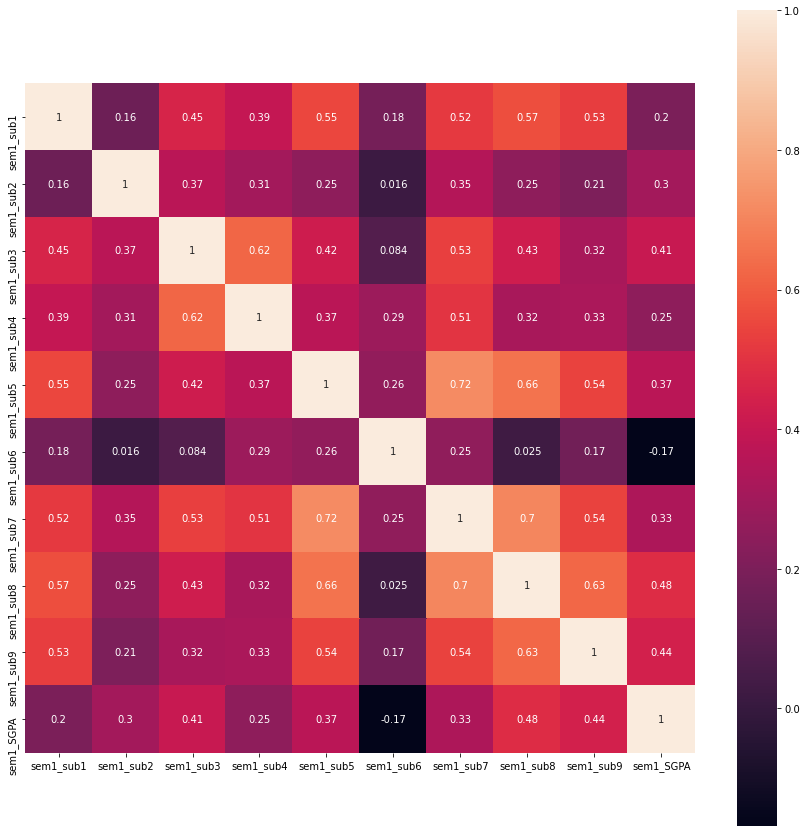

In [20]:
corrmat = semester1_df.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

In [21]:
columns = list(semester1_df.columns.values)
print("Columns = ", columns)

Columns =  ['sem1_sub1', 'sem1_sub2', 'sem1_sub3', 'sem1_sub4', 'sem1_sub5', 'sem1_sub6', 'sem1_sub7', 'sem1_sub8', 'sem1_sub9', 'sem1_SGPA']


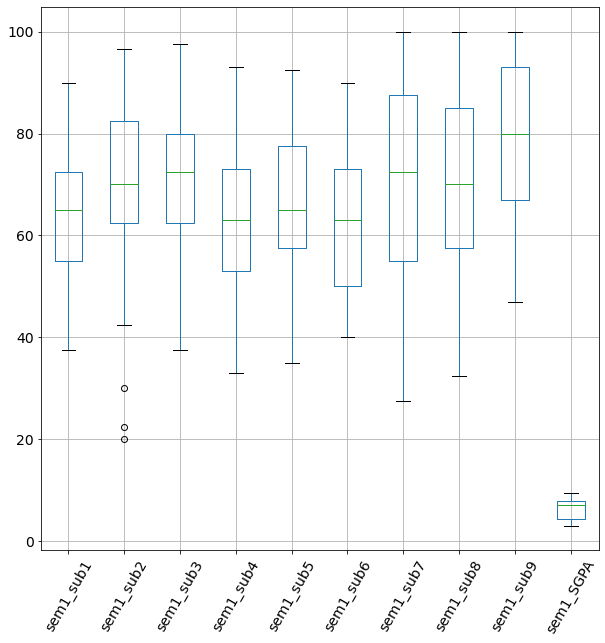

In [22]:
boxplot = semester1_df.boxplot(column=columns, figsize=(10,10), fontsize=14, rot=60)

In [23]:
semester1_df.describe()

,sem1_sub1,sem1_sub2,sem1_sub3,sem1_sub4,sem1_sub5,sem1_sub6,sem1_sub7,sem1_sub8,sem1_sub9,sem1_SGPA
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,65.142857,70.776190,71.714286,63.133333,66.952381,62.942857,70.547619,70.500000,78.171429,6.435790
std,10.718360,14.927707,12.758454,13.112726,14.523609,14.005376,18.259550,17.280213,14.822318,1.802120
min,37.500000,20.000000,37.500000,33.000000,35.000000,40.000000,27.500000,32.500000,47.000000,3.050572
25%,55.000000,62.500000,62.500000,53.000000,57.500000,50.000000,55.000000,57.500000,67.000000,4.437008
50%,65.000000,70.000000,72.500000,63.000000,65.000000,63.000000,72.500000,70.000000,80.000000,7.170000
75%,72.500000,82.500000,80.000000,73.000000,77.500000,73.000000,87.500000,85.000000,93.000000,7.850000
max,90.000000,96.500000,97.500000,93.000000,92.500000,90.000000,100.000000,100.000000,100.000000,9.410000


* **From the above boxplot and semester1_df.describe() it is clearly visible that our data has not much deviated in each percentile. That is why we do not want to apply scaling or normalization. We can only see a significant change SGPA which we are execting as it is.**

## Insights from data
* Since we only have 57 or 58 data we cannot better results from regression trees like decision tree regressor or random forest regressor. If we have more data we can apply these kind of algorithms which is relying on bootstrap(sampling with replacement). 
* However we can't make assumptions prior to testing, so we have to apply all the algorithms available in the library in a single stretch by looping and we have to check the accuracy scores.

## Building Model

In [24]:
# Training data do not contains any headers or target values.
# So convert entire dataset to numpy array
array = semester1_df.values
array.shape

(105, 10)

In [25]:
# As we said earlier Training data do not contains any headers or target values
# So just slice the numpy array
X = array[:,0:9]
print(X.shape)
# checking whether everything working fine by taking fist row of our data
X[0]

(105, 9)


array([57.5, 52.5, 75. , 47. , 72.5, 57. , 50. , 42.5, 73. ])

In [26]:
# Then create our test data. Test data contains only target values
Y = array[:,9]
# checking whether everything working fine by printing target column
Y[0]

7.0

In [27]:
# Splitting data for training and validation
validation_size = 0.30
seed = 3
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, shuffle=True, random_state=seed)

In [28]:
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
models = []
models.append(('Linear', LinearRegression()))
models.append(('Lasso', Lasso(alpha=0.1)))
models.append(('Ridge', Ridge(alpha=10)))
models.append(('SVR', LinearSVR()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('Polynomial, ', poly_model))
results = []
names = []
scoring = 'accuracy'

## Why negative accuracy metric?
* Read article given in this website http://www.fairlynerdy.com/what-is-r-squared/
* Our data is too small, So we have to think about another plan

Linear  r2 score: 0.20
X_validation (32, 9) Y_validation (32,)
X_train (73, 9) Y_train (73,)
Linear 0.20249658055996955


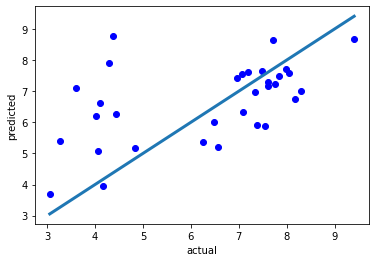

Lasso  r2 score: 0.20
X_validation (32, 9) Y_validation (32,)
X_train (73, 9) Y_train (73,)
Lasso 0.2009663899239308


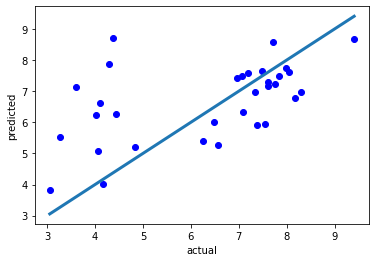

Ridge  r2 score: 0.20
X_validation (32, 9) Y_validation (32,)
X_train (73, 9) Y_train (73,)
Ridge 0.20259463641304956


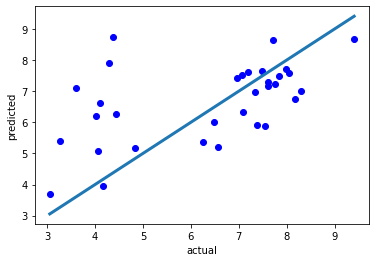

SVR  r2 score: 0.17
X_validation (32, 9) Y_validation (32,)
X_train (73, 9) Y_train (73,)
SVR 0.16804625990974206


/home/arun/Documents/Project/GPAPrediction/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


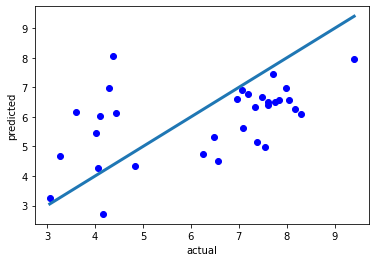

DT  r2 score: -0.49
X_validation (32, 9) Y_validation (32,)
X_train (73, 9) Y_train (73,)
DT -0.49468380615298946


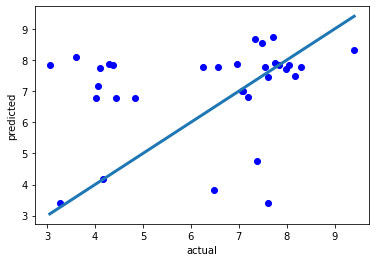

Polynomial,   r2 score: -4.11
X_validation (32, 9) Y_validation (32,)
X_train (73, 9) Y_train (73,)
Polynomial,  -4.109607959380494


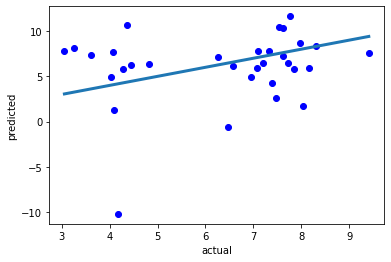

In [29]:
from sklearn.metrics import r2_score
for name, model in models:
    clf = model
    clf.fit(X_train, Y_train)
    predicted = clf.predict(X_validation)
    print(name, ' r2 score: %.2f' % r2_score(Y_validation, predicted))
    print('X_validation', X_validation.shape, 'Y_validation', Y_validation.shape)
    print('X_train', X_train.shape, 'Y_train', Y_train.shape)
    results.append(r2_score(Y_validation, predicted))
    names.append(name)
    accuracy = clf.score(X_validation, Y_validation)
    print(name, accuracy)
    plt.scatter(Y_validation, predicted, color='blue')
    plt.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], lw=3)
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.show()

## Way to overcome lesser number of data...

* Best way: Increase data in the dataset
* In first semester excel sheet, I found 9 data and found 8 subjects each in other excel sheets.
* If we append data row by row we lacks 1 column after first semester. So if we do so, we are filling NaN values on $9^{th}$ column. One idea is we can fill those column with NaN values with cumulative distribution function(CDF or a kind of runing average). Or simply removing a column from from first semester data.

## Let Us try with Pycaret

* Pycaret is low code ML library. Using Pycaret I am trying to find better algorithm which can perform on these small dataset.

In [30]:
from pycaret.regression import *
#intialize the setup
exp_reg = setup(semester1_df, target = 'sem1_SGPA')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6932
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(105, 10)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [31]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,TheilSen Regressor,1.178500,2.213100,1.475400,0.243300,0.226400,0.232100
1,Elastic Net,1.201500,2.221600,1.481300,0.240700,0.225000,0.233700
2,Linear Regression,1.189500,2.233200,1.483900,0.239200,0.224300,0.229900
3,Ridge Regression,1.189500,2.233100,1.483800,0.239200,0.224200,0.229900
4,Bayesian Ridge,1.221300,2.247600,1.489400,0.238800,0.228100,0.241400
5,Lasso Regression,1.217600,2.250200,1.491000,0.232500,0.227800,0.238700
6,Huber Regressor,1.167300,2.320100,1.505500,0.219700,0.229200,0.234400
7,Light Gradient Boosting Machine,1.163100,2.349100,1.518500,0.174600,0.230700,0.233700
8,AdaBoost Regressor,1.260300,2.386500,1.519400,0.158100,0.231600,0.243400
9,K Neighbors Regressor,1.240000,2.470200,1.554400,0.148000,0.238900,0.247700


In [32]:
lasso_regression = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.3917,2.2558,1.5019,0.1691,0.2129,0.2282
1,1.2442,2.4739,1.5729,0.1952,0.2366,0.2517
2,1.2808,2.7788,1.6670,0.2082,0.2431,0.2316
3,1.3497,3.0245,1.7391,-0.2123,0.2937,0.3409
4,1.3523,2.2553,1.5018,0.4827,0.2601,0.2967
5,1.2435,2.3411,1.5301,0.4124,0.2473,0.2605
6,1.1281,1.7775,1.3332,0.3440,0.2073,0.2152
7,0.9571,2.2410,1.4970,0.1651,0.2056,0.1709
8,0.9572,1.2325,1.1102,0.2183,0.1413,0.1292
9,1.2717,2.1212,1.4564,0.3420,0.2298,0.2622


In [33]:
tuned_lasso = tune_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4649,2.6976,1.6424,0.0063,0.2297,0.2364
1,1.2563,2.6141,1.6168,0.1496,0.2401,0.2542
2,1.2018,2.2205,1.4901,0.3673,0.2245,0.2242
3,1.3497,2.7775,1.6666,-0.1134,0.2765,0.3211
4,1.1563,2.1866,1.4787,0.4984,0.2492,0.2235
5,1.2017,2.4735,1.5727,0.3792,0.2525,0.2524
6,1.0927,1.8649,1.3656,0.3117,0.2097,0.2037
7,1.0025,2.5247,1.5889,0.0594,0.2166,0.1842
8,0.7641,0.8854,0.9409,0.4385,0.1223,0.1051
9,1.3065,2.0961,1.4478,0.3498,0.2382,0.2784


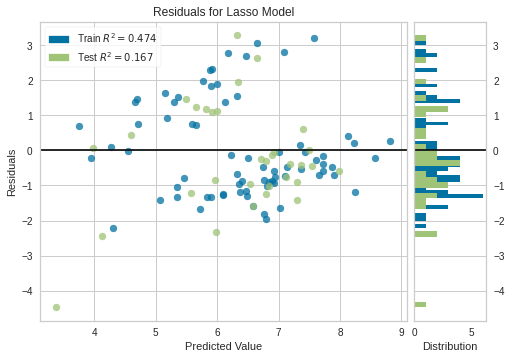

In [34]:
plot_model(lasso_regression)

In [35]:
evaluate_model(lasso_regression)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

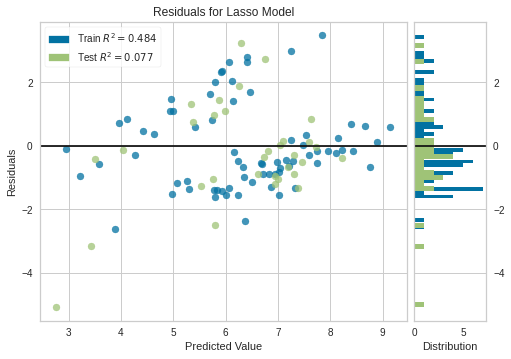

In [36]:
plot_model(tuned_lasso)

In [37]:
evaluate_model(tuned_lasso)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…